# Reading Images

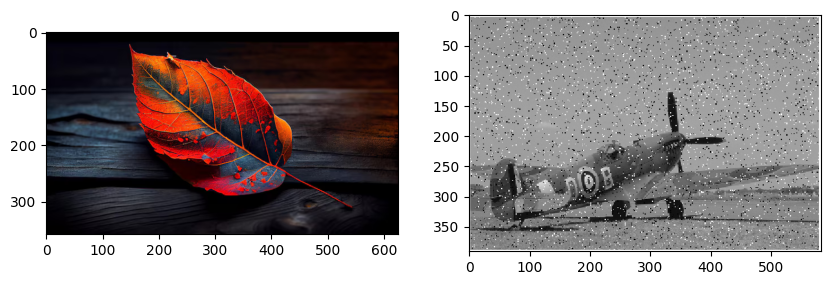

In [113]:
from skimage import io
import matplotlib.pyplot as plt
leaf=io.imread('image.png')
salty=io.imread('plane_noise.png')
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(leaf)
plt.subplot(122)
plt.imshow(salty)

# Cropping the image

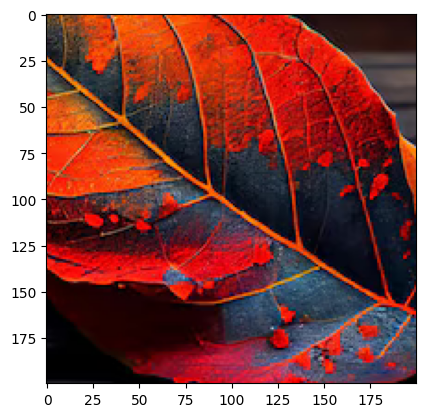

In [132]:
center_x, center_y = leaf.shape[1] // 2, leaf.shape[0] // 2
start_x = center_x - 100
start_y = center_y - 100
cropped_image = leaf[start_y:start_y + 200, start_x:start_x + 200]
cropped_image.shape
plt.imshow(cropped_image)

In [112]:
import cv2
x=cv2.imread('image.png')
cropped_image=cv2.resize(x,(200,200))
cropped_image.shape
cv2.imwrite('cropped_image.jpeg',cropped_image)

True

(200, 200, 3)


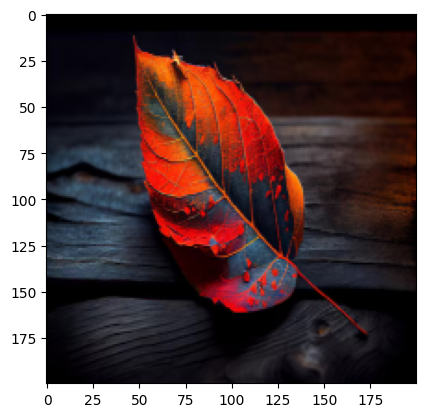

In [114]:
cropped_image=resize(leaf,
    (200,200,3),
    mode='reflect',
    cval=0)
print(cropped_image.shape)
plt.imshow(cropped_image)

# Saving the cropped image

In [ ]:
io.imsave('cropped_image.jpeg',cropped_image)
io.imsave('Im/cropped_image.jpeg',cropped_image)

# Reading all the files 

In [14]:
import os

In [15]:
os.listdir()

['.ipynb_checkpoints',
 'Answer.ipynb',
 'cropped_image.jpeg',
 'image.png',
 'plane_noise.png']

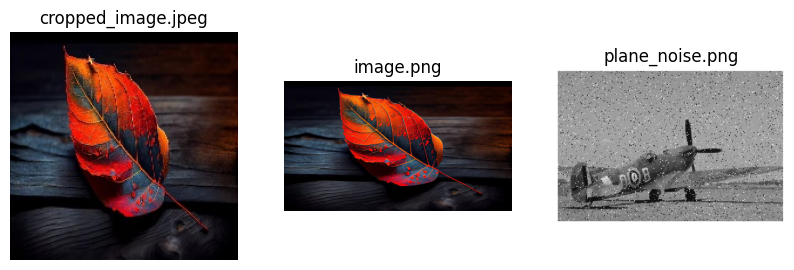

In [131]:
import os
filenames=os.listdir('Im')
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(10,6))
axs=axs.flatten()
for i in range(0,len(filenames)):
    img=Image.open(os.path.join('Im',filenames[i]))
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(filenames[i])

plt.show()


# Blurring the image

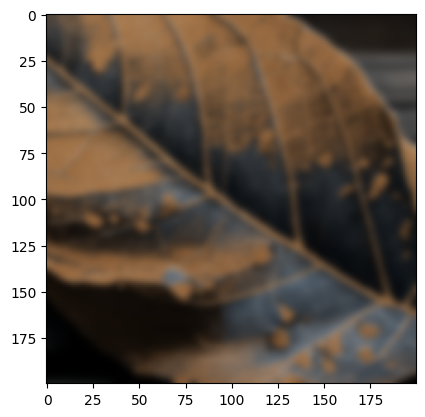

In [133]:
from skimage.filters import gaussian
blurred_image=gaussian(cropped_image,
    sigma=2,
    mode='nearest',
    cval=0)
plt.imshow(blurred_image)

# Applying two filters

In [21]:
from skimage.filters import median

In [23]:
median_image=median(salty)

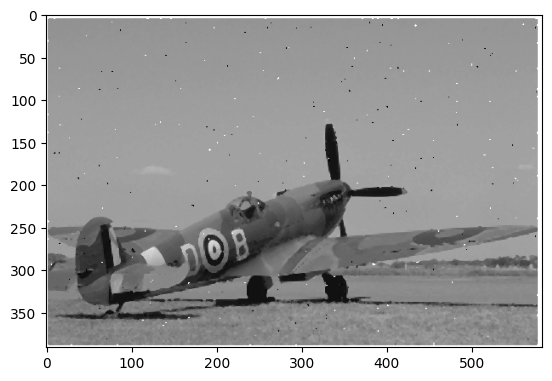

In [33]:
plt.imshow(median_image)

In [40]:
from skimage.restoration import denoise_bilateral
salty=io.imread('plane_noise.png',as_gray=True)
bilateral_image=denoise_bilateral(salty,
    sigma_color=0.05,
    sigma_spatial=15,
    mode='constant',
    cval=0)

Text(0.5, 1.0, 'using bilateral filter')

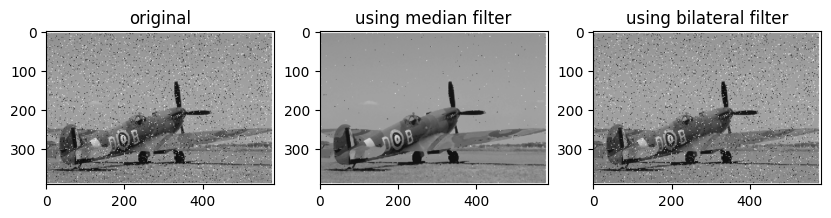

In [61]:
plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(salty,cmap='gray')
plt.title("original")

plt.subplot(132)
plt.imshow(median_image,cmap='gray')
plt.title("using median filter")

plt.subplot(133)
plt.imshow(bilateral_image,cmap='gray')
plt.title("using bilateral filter")

### Median filter is performing great

# Finding Histogram

In [25]:
from skimage.exposure import histogram

C:\Python311\Lib\site-packages\skimage\_shared\utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


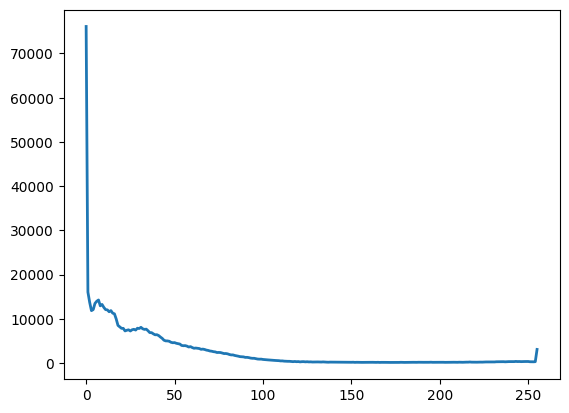

In [32]:
hi,h_c=histogram(leaf)
plt.plot(h_c, hi, lw=2)

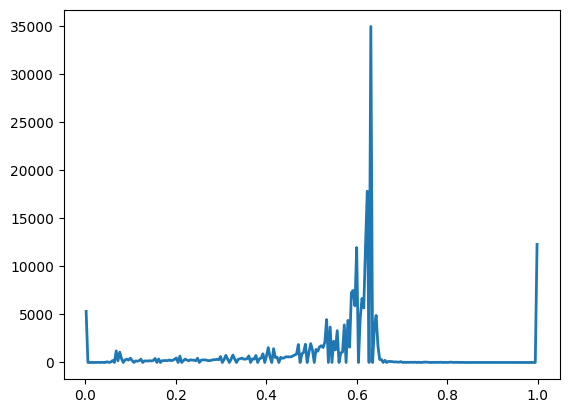

In [59]:
hi_1,h_c_1=histogram(salty)
plt.plot(h_c_1, hi_1, lw=2)

# Applying canny edge detection

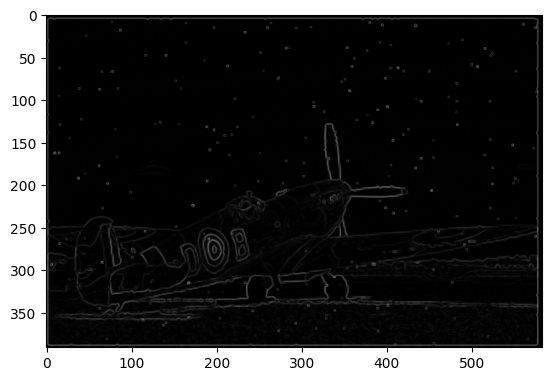

In [46]:
from skimage.filters import sobel
edges=sobel(median_image)
plt.imshow(edges)

# Finding FT of the cropped Image

Text(0.5, 1.0, 'back to spatial domain')

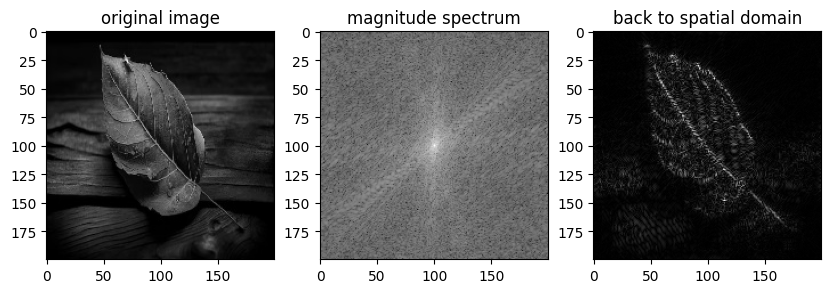

In [115]:
import numpy as np
cropy=cv2.imread('cropped_image.jpeg',0)
dft = cv2.dft(np.float32(cropy), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

rows, cols = cropy.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

fshift = dft_shift * mask

dft_ishift = np.fft.ifftshift(fshift)
image_back = cv2.idft(dft_ishift)
image_back = cv2.magnitude(image_back[:, :, 0], image_back[:, :, 1])

plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(cropy,cmap='gray')
plt.title('original image')
plt.subplot(132)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('magnitude spectrum')

plt.subplot(133)
plt.imshow(image_back,cmap='gray')
plt.title('back to spatial domain')